In [1]:
import numpy as np 
import pprint
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

In [2]:
def basic_hash_table(value_l, n_buckets):
    
    def hash_function(value , n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)} # initialize all the buckets in the hash table as empty 

    for value in value_l:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value].append(value)

    return hash_table


In [3]:
value_l =[100,50,10,20,16,19]

hash_table_example = basic_hash_table(value_l, 10)

In [4]:
hash_table_example

{0: [100, 50, 10, 20],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [16],
 7: [],
 8: [],
 9: [19]}

In [15]:
def plot_vector(vectors, colors=['k','b','r','m','c'], axes = None, fname='image.svg',ax=None):
    scale = 1
    scale_units ='x'
    x_dir = []
    y_dir = []

    for i, vec in enumerate(vectors):
        if vec.shape[0] ==1 :
            x_dir.append(vec[0][0])
            print("print(x_dir)",x_dir)
            y_dir.append(vec[0][1])
            print("y_dir",y_dir)
        elif vec.shape[1] ==1:
            x_dir.append(vec[0][0])
            y_dir.append(vec[1][0])

    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax        

    if axes ==None:
        x_axis = 2+ np.max(np.abs(x_dir))
        y_axis = 2+ np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
    
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])

    for i, vec in enumerate(vectors):
        if vec.shape[0]==1:
            ax2.arrow(0,0,vec[0][0], vec[0][1], head_width = 0.05 * x_axis, head_length= 0.05 *y_axis, fc = colors[i],ec=colors[i])
        if vec.shape[1] ==1:
            ax2.arrow(0,0,vec[0][0], vec[1][0], head_width = 0.05*x_axis, head_length =0.05*y_axis, fc= colors[i], ec= colors[i])

    if ax == None:
        plt.show()
        fig.savefig(fname)

print(x_dir) [1]
y_dir [1]


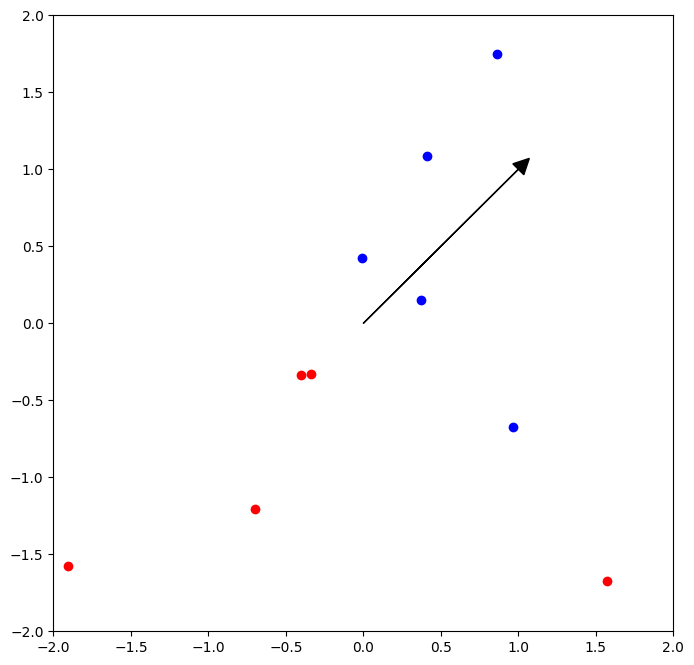

In [22]:
P = np.array([[1,1]]) # Defining a single plane. 
fig, ax1 = plt.subplots(figsize=(8,8))

plot_vector([P], axes=[2,2], ax = ax1)

#Plot random points. 
for i in range(0,10):
    v1 = np.array(np.random.uniform(-2,2,2))
    side_of_plane = np.sign(np.dot(P, v1.T))

    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane ==1:
        ax1.plot([v1[0]], [v1[1]],'bo')
    else:
        ax1.plot([v1[0]],[v1[1]],'ro')

plt.show()

print(x_dir) [1]
y_dir [2]
print(x_dir) [8]
y_dir [-4]
print(x_dir) [8, -8]
y_dir [-4, 4]


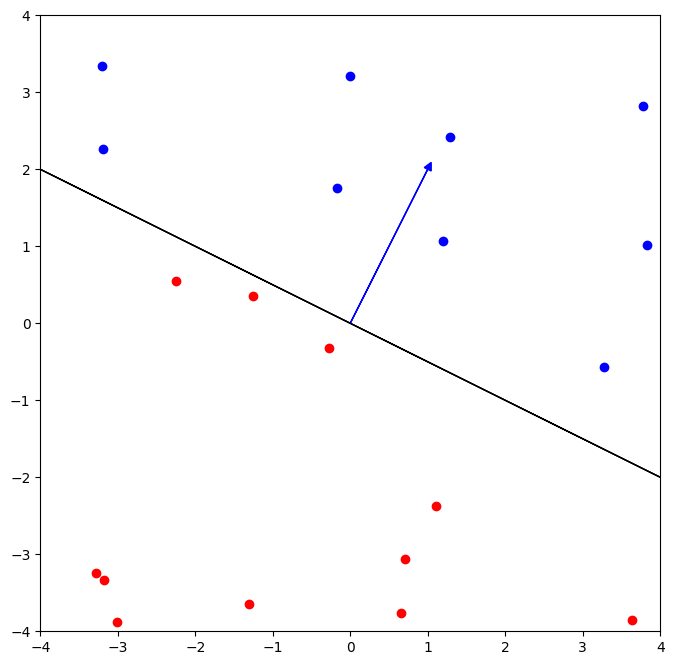

In [28]:
P = np.array([[1,2]])

# get a new plane perpendicular to p we use a rotation matrix
PT = np.dot([[0,1], [-1,0]], P.T).T

fig,ax1 = plt.subplots(figsize = (8,8))

plot_vector([P], colors=['b'], axes=[2,2], ax = ax1)

# plot the plane P as 2 vectors 
# we sclae by 2 just to get the arraows outside the current box 

plot_vector([PT*4,PT*-4], colors=['k','k'], axes=[4,4], ax= ax1)

# plot 20 random points 
for i in range(0,20):
    v1 = np.array(np.random.uniform(-4,4,2))
    side_of_plane = np.sign(np.dot(P,v1.T)) # Get the sign of the dot product with P
    # color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane ==1:
        ax1.plot([v1[0]],[v1[1]],'bo')
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')
plt.show()

In [29]:
P= np.array([1,1])
v1 = np.array([[1,2]])
v2 = np.array([[-1,1]])
v3 = np.array([[-2,-1]])

In [32]:
np.dot(P,v1.T)


array([3])

In [33]:
np.dot(P,v2.T)

array([0])

In [34]:
np.dot(P,[v3.T])

array([[-3]])

In [36]:
def side_of_plane(P,v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct)
    sign_of_dot_product_scalar = sign_of_dot_product.item()
    return sign_of_dot_product_scalar

In [37]:

side_of_plane(P,v1)


1

In [38]:
side_of_plane(P,v2)

0

In [40]:
side_of_plane(P,v3)

-1

# Hash plane with multiple planes 

In [45]:
P1 = np.array([[1,1]])
p2 = np.array([[-1,1]])
p3 = np.array([[-1,-1]])
P_l = [P1,p2,p3]

#vector to search 
v = np.array([[2,2]])


In [46]:
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, p in enumerate(P_l):
        sign = side_of_plane(p, v)
        hash_i = 1 if sign >=0 else 0 
        hash_value +=2**i * hash_i
    return hash_value 

In [47]:
hash_multi_plane(P_l, v)

3

# Random Plane

In [48]:
np.random.seed(0)
num_dimensions = 2 # is 300 in assignment 
num_planes = 3
random_planes_matrix = np.random.normal(size=(num_planes, num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [49]:
V = np.array([[2,2]])

In [50]:
def side_of_plane_matrix(P,v):
    dotproduct = np.dot(P,v.T)
    sign_of_dot_product = np.sign(dotproduct)
    return sign_of_dot_product

In [51]:
sides_l = side_of_plane_matrix(random_planes_matrix,v)
sides_l

array([[1.],
       [1.],
       [1.]])

In [52]:
def hash_multi_plane_matrix(P,v, num_planes):
    sides_matrix = side_of_plane_matrix(P,v)
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item()
        hash_i = 1 if sign >= 0 else 0 
        hash_value += 2 **i * hash_i # sum 2^i * hash_i

    return hash_value 

In [53]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

# Document vector 

In [54]:
word_embedding ={"I":np.array([1,0,1]),
                 "love":np.array([-1,0,1]),
                 "learning":np.array([1,0,1])
                 }
words_in_document = ["I","love","learning","not_a_word"]
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word,0)

print(document_embedding)

[1 0 3]
